# Reading data

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("spam.csv", encoding = "ISO-8859-1")

In [3]:
data.tail(n=10)

v1                                                 v2 Unnamed: 2  \
5562   ham  Ok lor... Sony ericsson salesman... I ask shuh...        NaN   
5563   ham                                Ard 6 like dat lor.        NaN   
5564   ham  Why don't you wait 'til at least wednesday to ...        NaN   
5565   ham                                       Huh y lei...        NaN   
5566  spam  REMINDER FROM O2: To get 2.50 pounds free call...        NaN   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
5562        NaN        NaN  
5563        NaN        NaN  
5564        NaN        NaN  
5565        NaN        NaN  
5566        NaN        NaN  
5567        NaN        NaN  
5568        NaN        NaN  
5569        NaN        NaN  
5570        NaN        NaN  
5571        NaN        NaN

In [4]:
data.shape

(5572, 5)

# Data Cleaning

In [5]:
import nltk
from nltk.tokenize import word_tokenize
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
stop_words = set(stopwords.words('english'))

In [6]:
data

v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  
2           NaN        NaN  
3           NaN        NaN  
4           NaN        NaN  
...         ...        ...  
5567        NaN        NaN  
5568        NaN        NaN  
5569        NaN        NaN  
5570        NaN        NaN  
5571        NaN        NaN  

[5572 rows x 5 columns]

In [7]:
columns_to_drop = ['Unnamed: 2',"Unnamed: 3","Unnamed: 4"]
data.drop(columns_to_drop,inplace=True, axis=1)

In [8]:
data

v1                                                 v2
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]

In [9]:
def clean_text(text):
    """
    To clean a textual data
    params: text : str
    return final_text : str
    """
    # remove punctuations from text
    punctuations_removed = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(punctuations_removed)
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    # filter out stop words
    words = [w for w in words if not w in stop_words]
    #stemming the tokens
    stemmed = [porter.stem(word) for word in words]
    final_text = ' '.join(stemmed)
    return final_text

In [10]:
data['v2'] = data['v2'].apply(clean_text)

In [11]:
data.shape

(5572, 2)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer, LabelEncoder

In [13]:
X_train, X_test, y_train, y_test = train_test_split(data['v2'], data['v1'], test_size = 0.2, random_state = 2)

In [14]:
y_train.shape

(4457,)

In [15]:
X_test.shape

(1115,)

In [16]:
x_test_list = X_test.tolist()
y_test_list = y_test.tolist()

In [17]:
Encoder = LabelEncoder()
y_train = Encoder.fit_transform(y_train)
y_test = Encoder.fit_transform(y_test)

# converting text to numerical representation


In [18]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(data['v2'])
X_train = Tfidf_vect.transform(X_train)
X_test = Tfidf_vect.transform(X_test)

## Building voting based classifier (Hard Voting) 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

naive_bayes_classifier = MultinomialNB(alpha=0.2)
knn_classifier = KNeighborsClassifier(n_neighbors=3)
svm_classifier = SVC()

hard_voting_based_classifier = VotingClassifier(
    estimators=[('svm', svm_classifier), ('knn', knn_classifier), ('naive', naive_bayes_classifier)],
    voting='hard')

for clf, label in zip([svm_classifier, knn_classifier, naive_bayes_classifier, hard_voting_based_classifier], ['Support Vector Machines', 'K Neaser Neighbor', 'Multinomial Naive Bayes', 'Hard Voting Based Ensemble Classifier']):
    scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5)
    print("5 fold cross validation done for --> ",label)
    print("The cross validation score is \n",scores)
    print("Average score for {} is {}".format(label,scores.mean()))
    print("\n")

## Building voting based classifier (Soft Voting)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

naive_bayes_classifier = MultinomialNB(alpha=0.2)
knn_classifier = KNeighborsClassifier(n_neighbors=3)
svm_classifier = SVC(probability=True)


hard_voting_based_classifier = VotingClassifier(
    estimators=[('svm', svm_classifier), ('knn', knn_classifier), ('naive', naive_bayes_classifier)],
    voting='soft', weights=[3, 1, 5])

for clf, label in zip([svm_classifier, knn_classifier, naive_bayes_classifier, hard_voting_based_classifier], ['Support Vector Machines', 'K Neaser Neighbor', 'Multinomial Naive Bayes', 'Hard Voting Based Ensemble Classifier']):
    scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5)
#     print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))
#     import pdb;pdb.set_trace()
    print("5 fold cross validation done for --> ",label)
    print("The cross validation score for every fold \n",scores)
    print("Average score for {} is {}".format(label,scores.mean()))
    print("\n")

## Building voting based classifier (Hard Voting) with rvm

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from skrvm import RVC

In [20]:
X_train = X_train.toarray()

naive_bayes_classifier = MultinomialNB(alpha=0.2)
knn_classifier = KNeighborsClassifier(n_neighbors=3)
svm_classifier = SVC()
rvm_classifier = RVC(kernel='linear')


rvm_classifier.fit(X_train,y_train)

rvm_classifier._estimator_type = 'classifier'

import time
start_time = time.time()

hard_voting_based_classifier = VotingClassifier(
    estimators=[('svm', svm_classifier), ('knn', knn_classifier), ('naive', naive_bayes_classifier),('rvm', rvm_classifier)],
    voting='hard')
hard_voting_based_classifier.fit(X_train,y_train)
end_time = time.time()
training_time = end_time - start_time
# for clf, label in zip([svm_classifier, knn_classifier, naive_bayes_classifier, hard_voting_based_classifier], ['Support Vector Machines', 'K Neaser Neighbor', 'Multinomial Naive Bayes','Relevance Vector Machine','Hard Voting Based Ensemble Classifier']):
#     scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5)
#     print("5 fold cross validation done for --> ",label)
#     print("The cross validation score is \n",scores)
#     print("Average score for {} is {}".format(label,scores.mean()))
#     print("\n")

import pickle
pickle.dump(hard_voting_based_classifier, open("models/Majority_Base_Voting_Final_Imbalanced_data", 'wb'))
 

In [21]:
import pickle
loaded_model = pickle.load(open("models/Majority_Base_Voting_Final_Imbalanced_data", 'rb'))

In [22]:
X_test = X_test.toarray()
y_pred = loaded_model.predict(X_test)

In [23]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

## Evaluation of the Ensemble Hard Voting Based Classifier with RVM

In [24]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9641255605381166


In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       957
           1       1.00      0.75      0.86       158

    accuracy                           0.96      1115
   macro avg       0.98      0.87      0.92      1115
weighted avg       0.97      0.96      0.96      1115



## Adding Majority Based Voting prediction to result_test_data.csv file

In [26]:
test_result_data = pd.read_csv("results/test_result_data_with_RVMR_SVM_NaiveBayes_LSTM_KNN_imbalanced.csv")
majority_based_voting_predictions = y_pred.tolist()
test_result_data['Majority Based Voting prediction'] = majority_based_voting_predictions
test_result_data.to_csv("results/test_result_data_with_RVMR_SVM_NaiveBayes_LSTM_KNN_Majority_based_voting_imbalanced.csv")

## Visualizing evaluation metrics

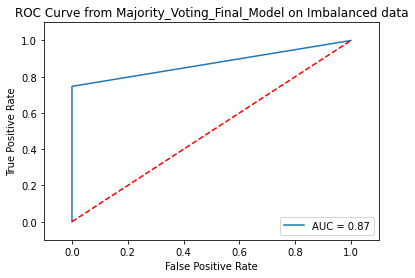

In [27]:
import matplotlib.pyplot as plt
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)

auc_score = metrics.auc(fpr, tpr)

# clear current figure
plt.clf()

plt.title('ROC Curve from Majority_Voting_Final_Model on Imbalanced data')
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc_score))

# it's helpful to add a diagonal to indicate where chance 
# scores lie (i.e. just flipping a coin)
plt.plot([0,1],[0,1],'r--')

plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc='lower right')
plt.savefig('results/Majority_Voting_Final_Model_roc_imbalanced.jpg')
plt.show()

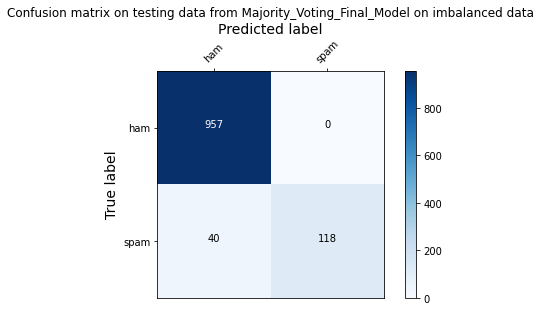

In [28]:
import itertools
import numpy as np
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test,y_pred)

plt.clf()

# place labels at the top
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position('top')

# plot the matrix per se
plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)

# plot colorbar to the right
plt.colorbar()

fmt = 'd'

# write the number of predictions in each bucket
thresh = matrix.max() / 2.
for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):

    # if background is dark, use a white number, and vice-versa
    plt.text(j, i, format(matrix[i, j], fmt),
         horizontalalignment="center",
         color="white" if matrix[i, j] > thresh else "black")

class_names = ['ham','spam']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.tight_layout()
plt.ylabel('True label',size=14)
plt.xlabel('Predicted label',size=14)
plt.title("Confusion matrix on testing data from Majority_Voting_Final_Model on imbalanced data")
plt.savefig('results/Majority_Voting_Final_Model_confusion_matrix_imbalanced.jpg')
plt.show()
